# Machine Learning Model to Predict Red Wine Quality

**Author**: Eric Simonds  
**Date**: May 2024

---

## Introduction

Red Wine is a fermented beverage with a deep and rich history, enjoyed at many tables over delicious meals or at tastings paired with fine cheeses. Judges have tested their palatte to explore notes and flavors of wines around the world. This model will explore whether characteristics of wine can predict the quality of its flavor. 

## Objectives

The primary objectives of this project are:
- To compare common characteristics of a particular Portuguese red wine.
- To analyze the correlation between the physicochemical features (input) and sensory (output) variables. 
- To visualize the distribution and relationships of these features.
- To build a Machine Learning Model using Linear Regression that can predict the quality based on the features.

## Data Source

The dataset used for this project is the [Wine Quality dataset](https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009) from Kaggle. It contains chemical properties and quality ratings for red and white wines.

## Methodology

The project follows these steps:
1. **Data Acquisition**: Load the dataset and inspect its structure.
2. **Data Preprocessing**: Clean the data by handling missing values and normalizing features.
3. **Exploratory Data Analysis (EDA)**: Perform descriptive statistical analysis and visualize the data.
4. **Reporting**: Document the entire process and summarize key insights.

## Outline

- **Section 1**: Data Exploration
- **Section 2**: Data Preprocessing
- **Section 3**: Exploratory Data Analysis (EDA)
- **Section 4**: Model Training and Evaluation

## Section 1
### Data Acquisition and Inspection

In [56]:
# Import packages for analysis
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Import the data to dataframe
dataset = pd.read_csv('winequality-red.csv')

In [3]:
# Preview the data
dataset.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [4]:
# Look in the dataset info, datatypes
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
# Look at the simple statistics of the data
dataset.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

## Section 2
### Data Preprocessing

In [6]:
# Check for missing values
missing_values = dataset.isnull().sum()
missing_values

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Section 3
### Exploratory Data Analysis (EDA)

Text(0, 0.5, 'Count')

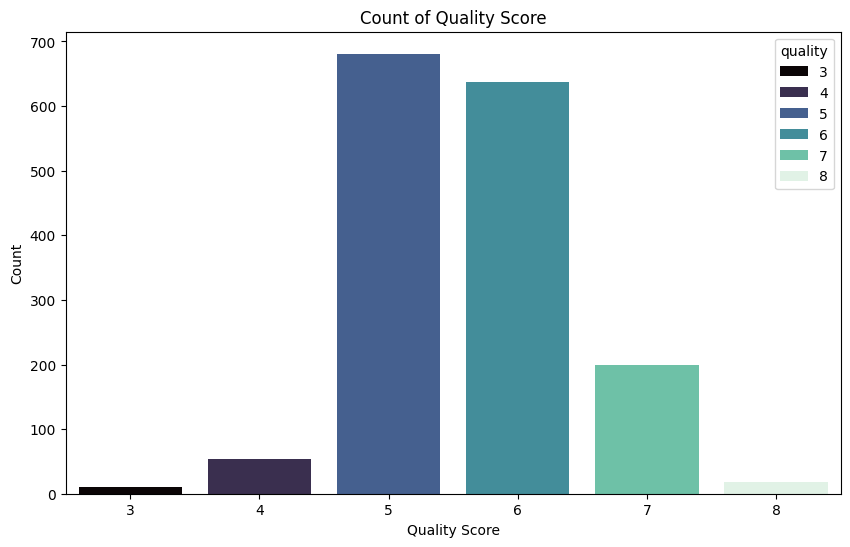

In [7]:
# Look at the quality count
plt.figure(figsize=(10, 6))
sns.countplot(data=dataset, x='quality', hue='quality', palette='mako')
plt.title('Count of Quality Score')
plt.xlabel('Quality Score')
plt.ylabel('Count')

Text(0.5, 0.98, 'Pair Plot of Features')

<Figure size 1000x600 with 0 Axes>

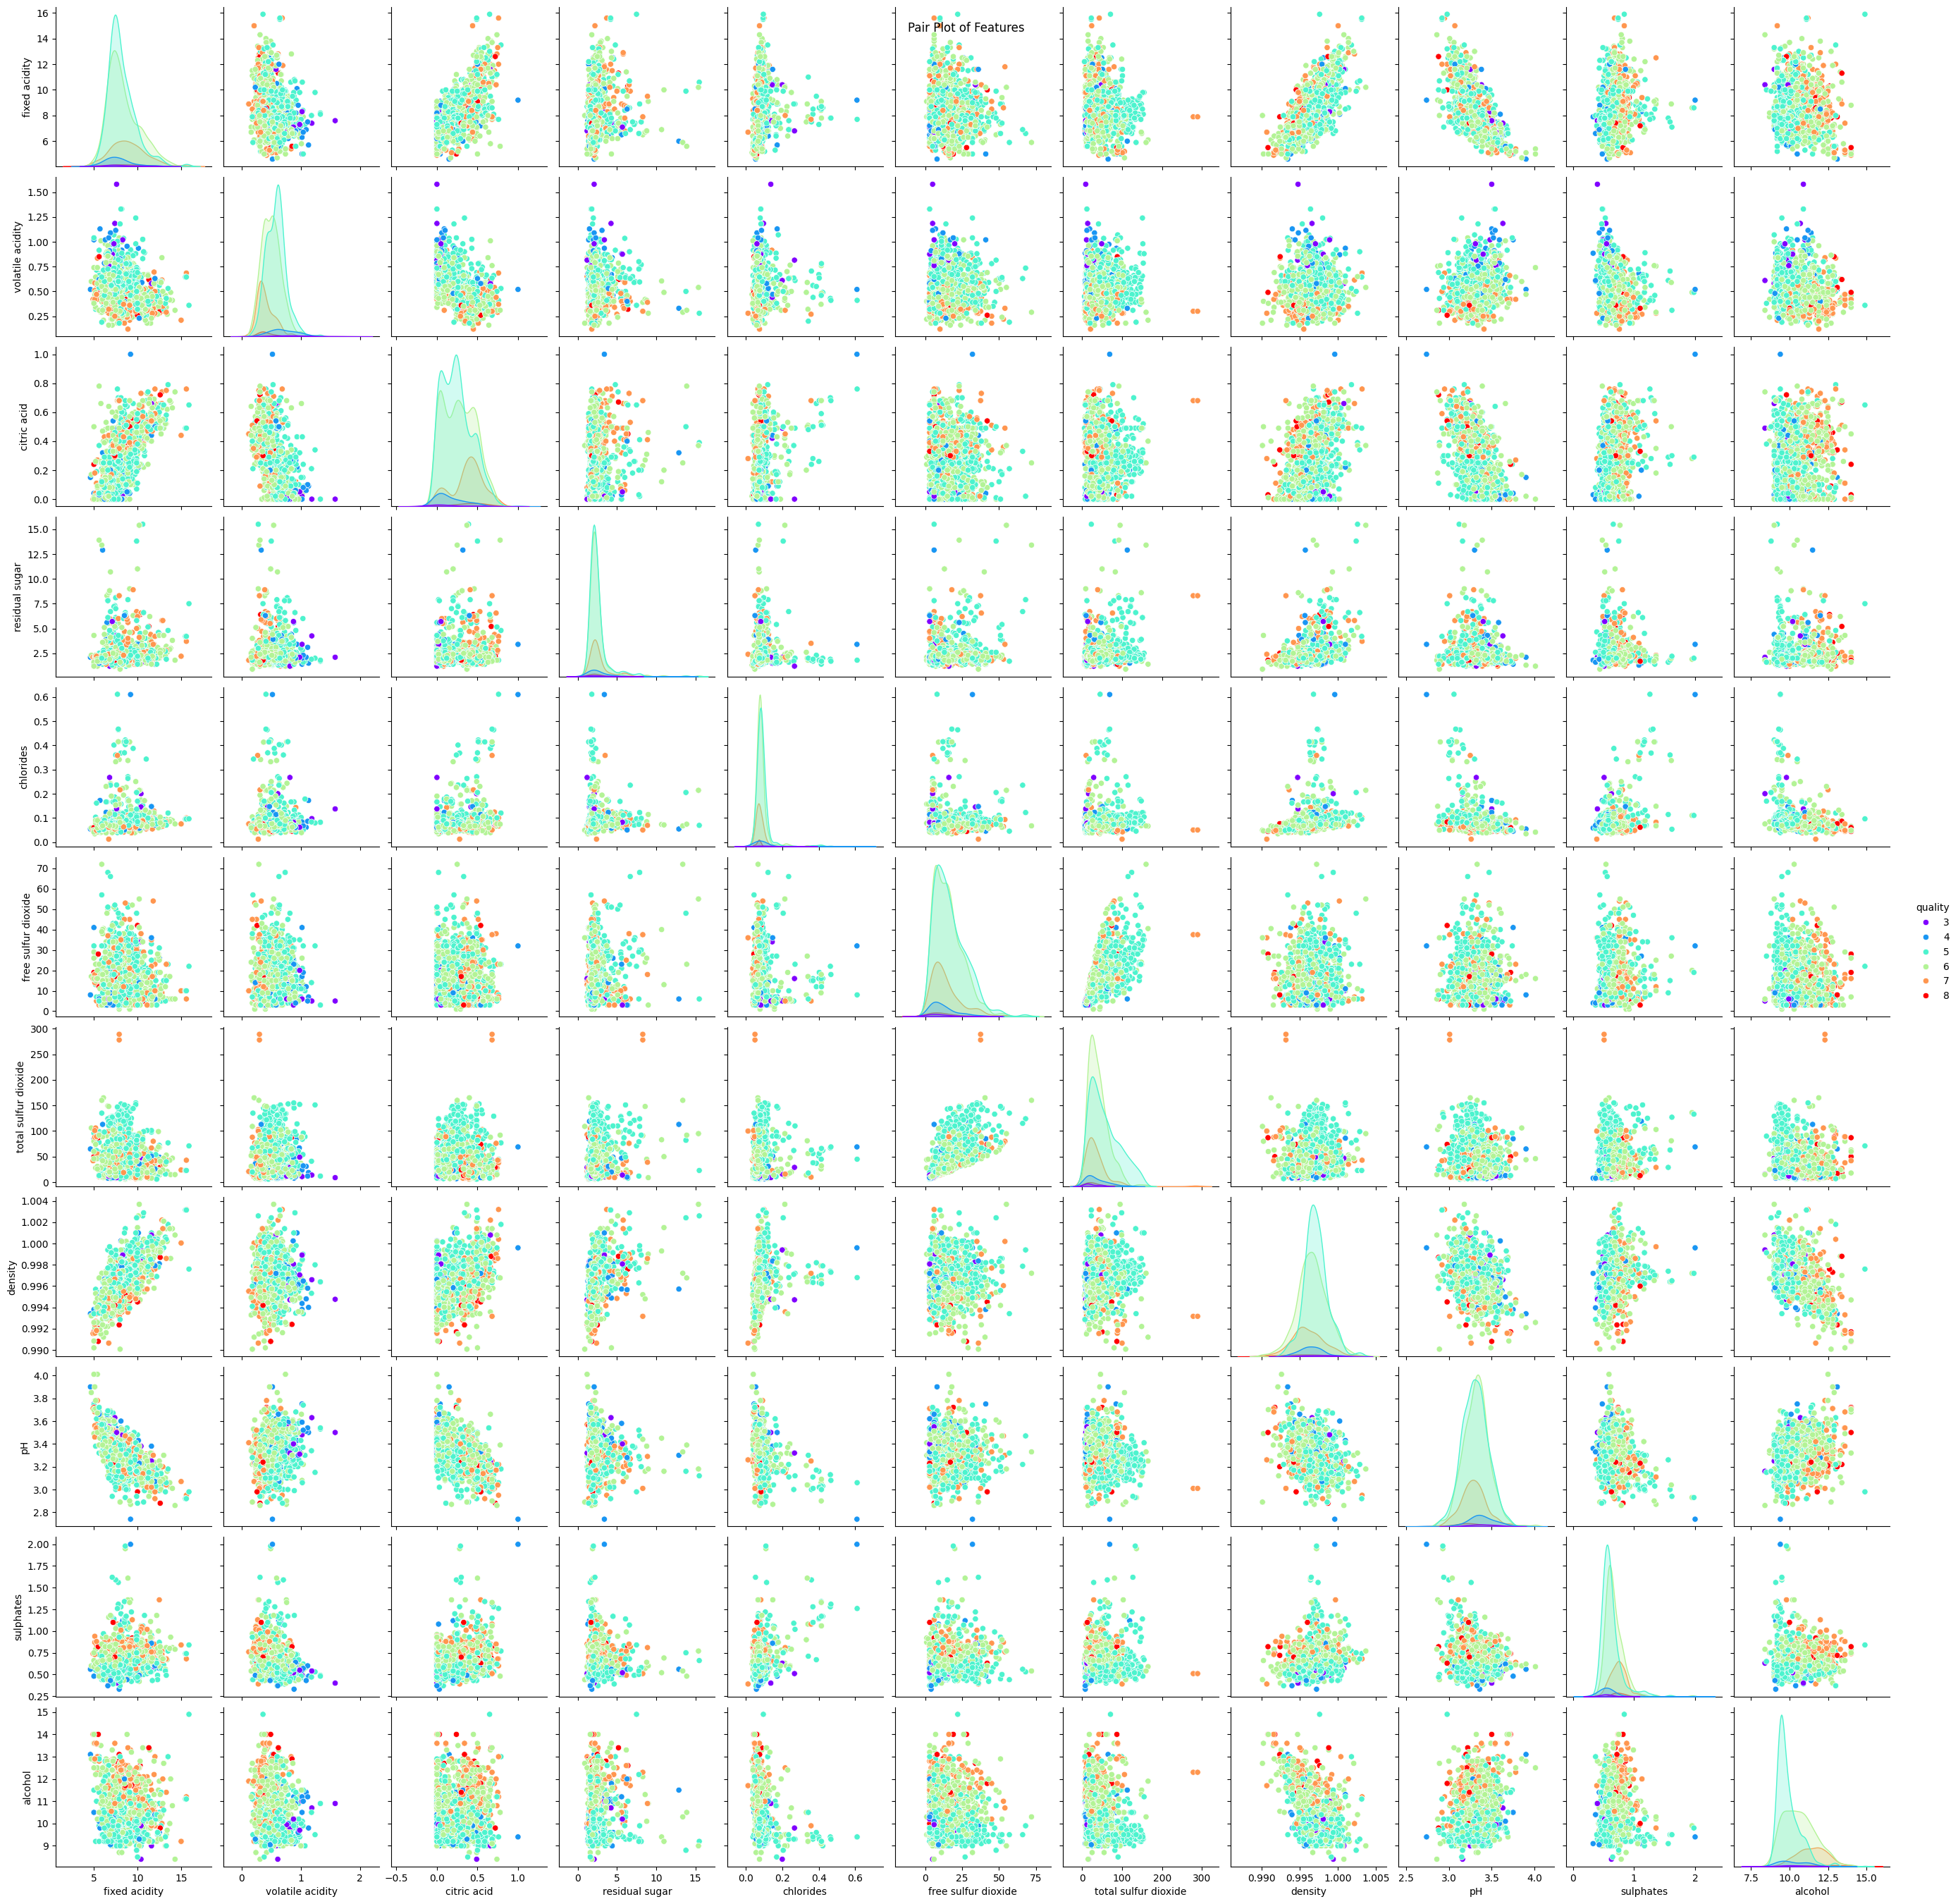

In [10]:
# Pair plot of the dataset features
plt.figure(figsize=(10, 6))
sns.pairplot(data=dataset, hue='quality', palette='rainbow', diag_kind='kde')
plt.suptitle('Pair Plot of Features')
plt.show()

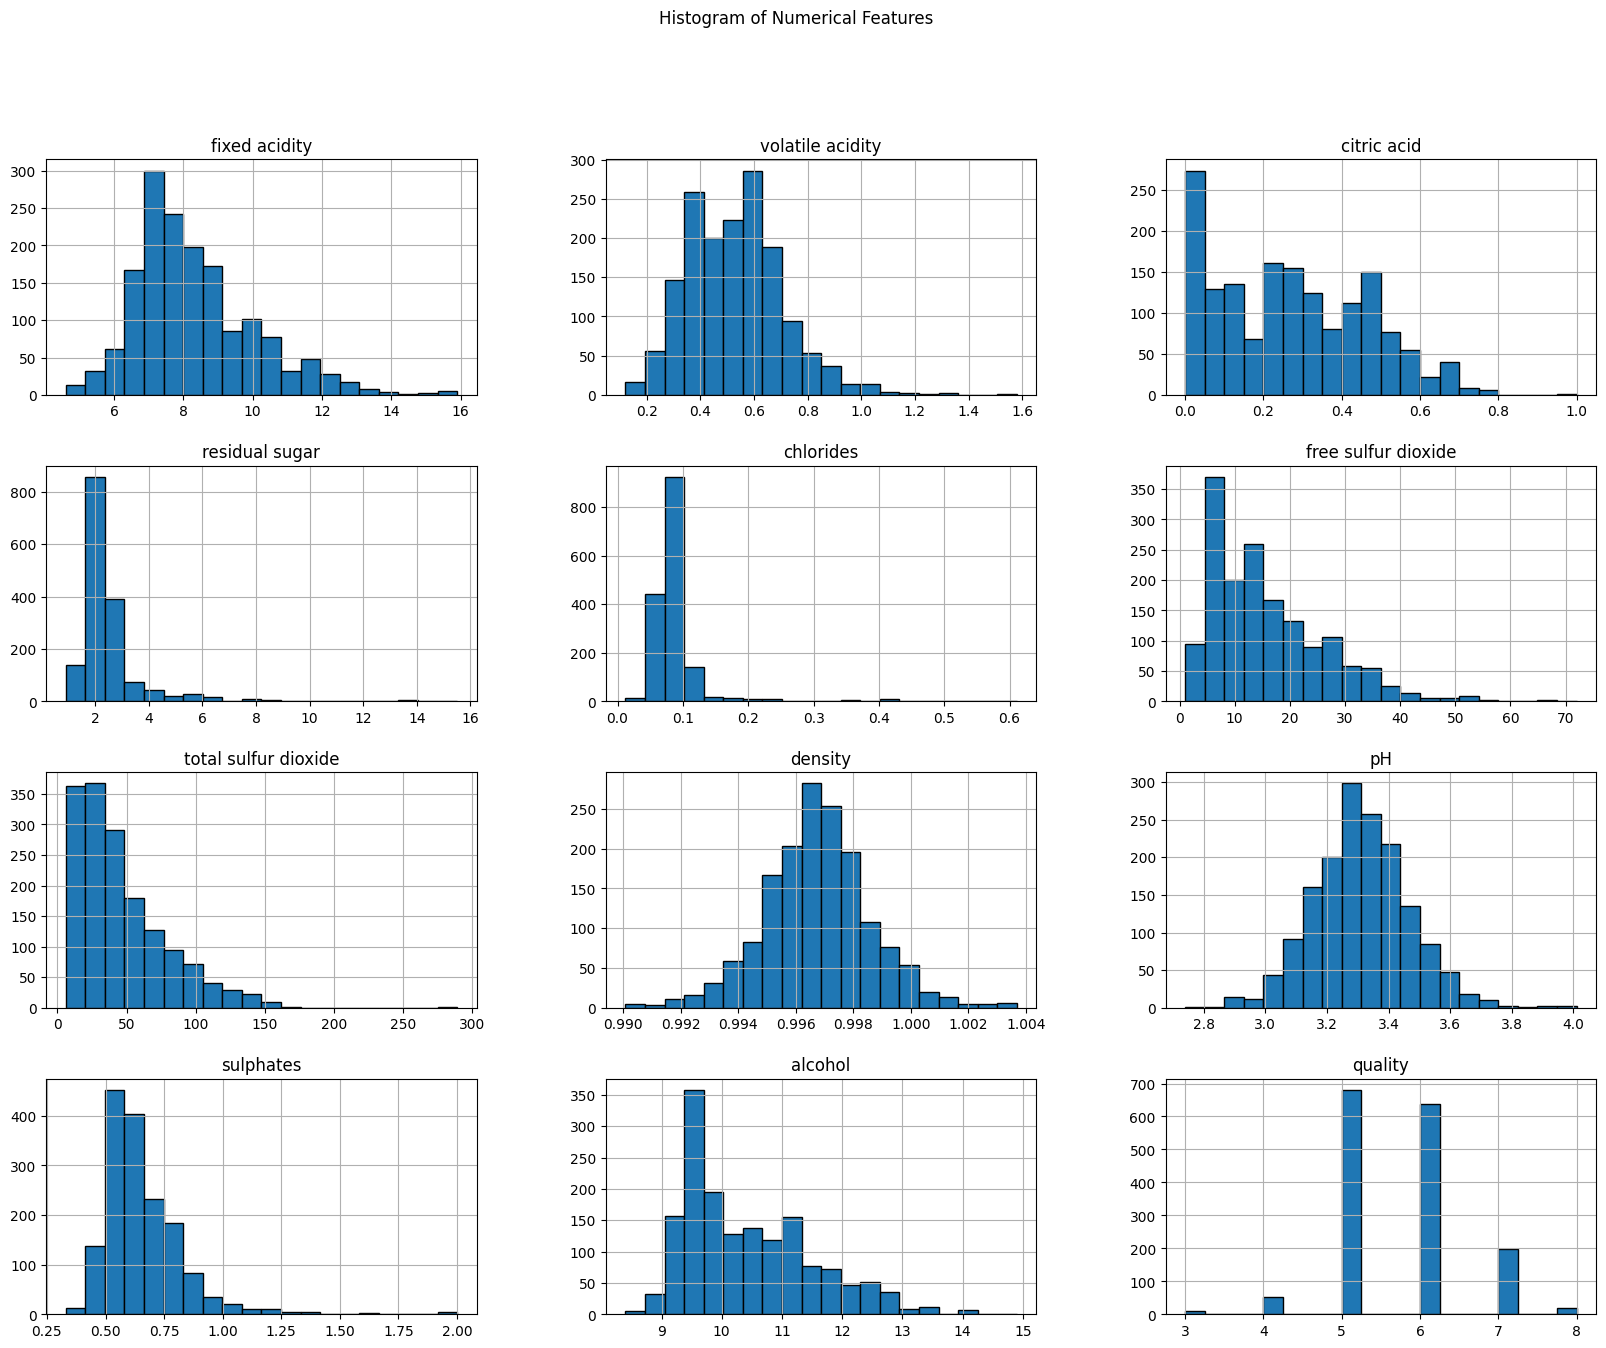

In [11]:
# Create histogram of the features
dataset.hist(bins=20, figsize=(20, 15), edgecolor='black')
plt.suptitle('Histogram of Numerical Features')
plt.show()

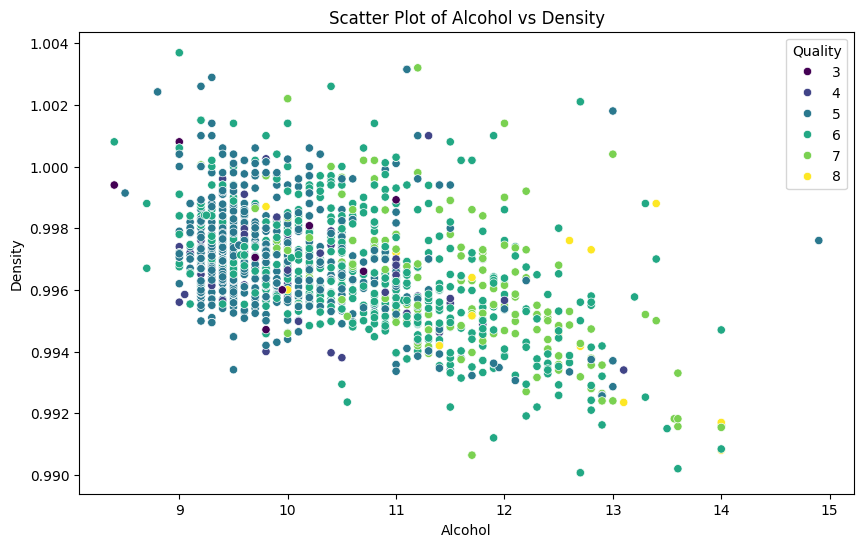

In [14]:
# Scatter Plot of Alcohol vs Density
plt.figure(figsize=(10, 6))
sns.scatterplot(x='alcohol', y='density', hue='quality', data=dataset, palette='viridis')
plt.title('Scatter Plot of Alcohol vs Density')
plt.xlabel('Alcohol')
plt.ylabel('Density')
plt.legend(title='Quality')
plt.show()


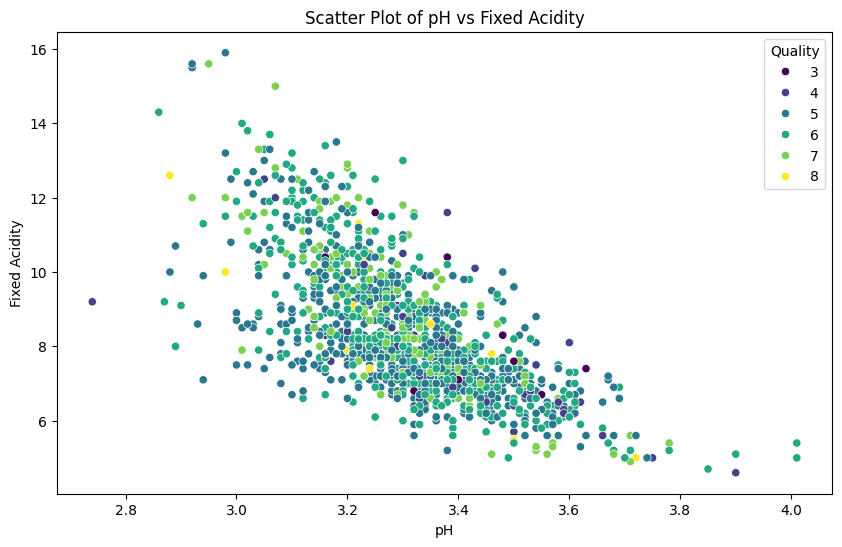

In [15]:
# Scatter Plot of pH vs Fixed Acidity
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pH', y='fixed acidity', hue='quality', data=dataset, palette='viridis')
plt.title('Scatter Plot of pH vs Fixed Acidity')
plt.xlabel('pH')
plt.ylabel('Fixed Acidity')
plt.legend(title='Quality')
plt.show()

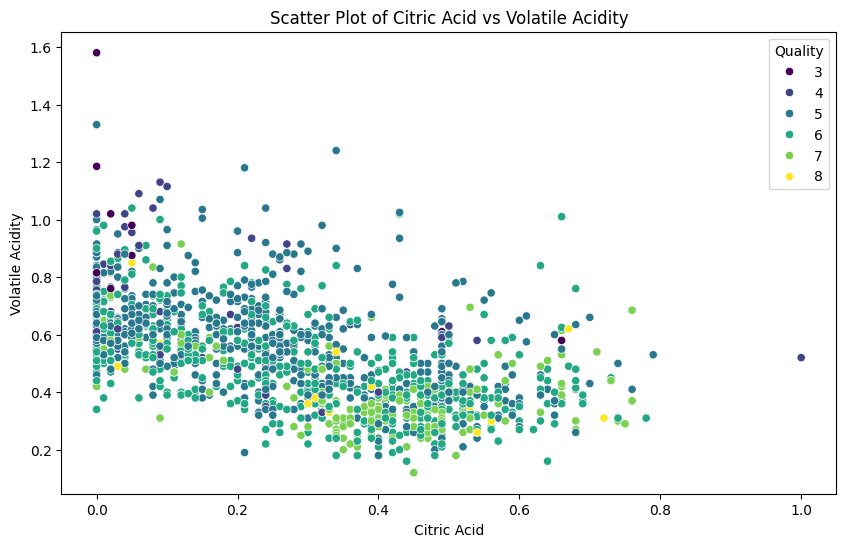

In [16]:
# Scatter Plot of Citric Acid vs Volatile Acidity
plt.figure(figsize=(10, 6))
sns.scatterplot(x='citric acid', y='volatile acidity', hue='quality', data=dataset, palette='viridis')
plt.title('Scatter Plot of Citric Acid vs Volatile Acidity')
plt.xlabel('Citric Acid')
plt.ylabel('Volatile Acidity')
plt.legend(title='Quality')
plt.show()

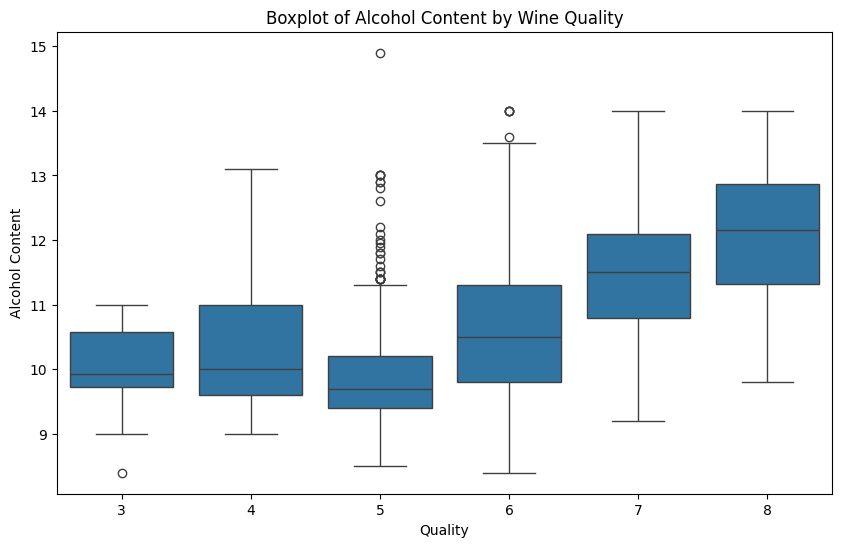

In [17]:
# Boxplot for Alcohol Content
plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='alcohol', data=dataset)
plt.title('Boxplot of Alcohol Content by Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Alcohol Content')
plt.show()

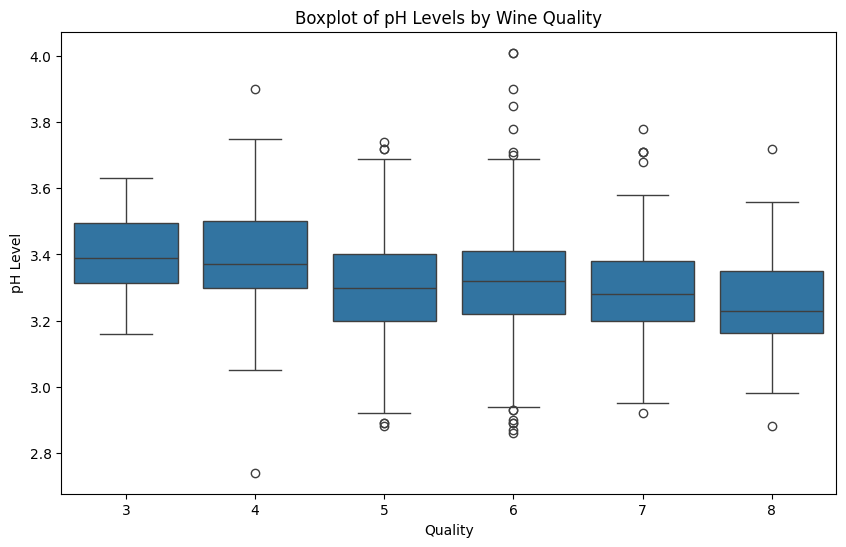

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='pH', data=dataset)
plt.title('Boxplot of pH Levels by Wine Quality')
plt.xlabel('Quality')
plt.ylabel('pH Level')
plt.show()

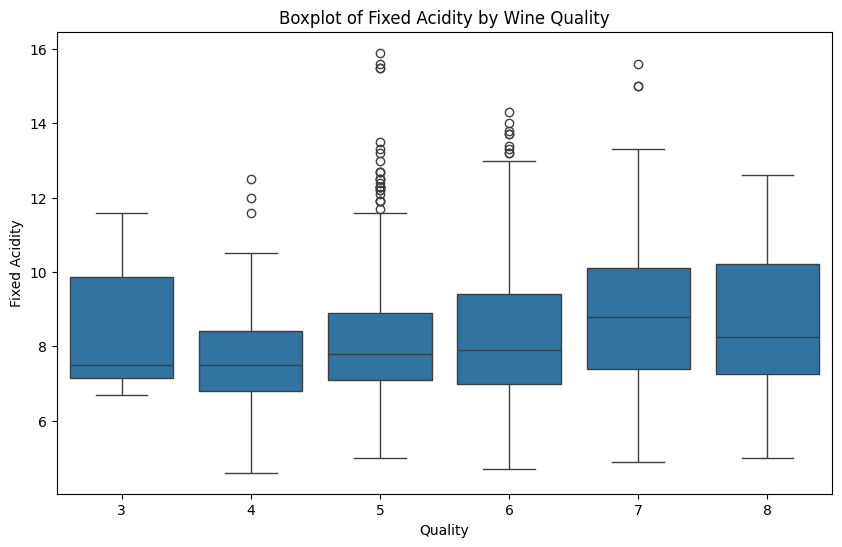

In [19]:
# Boxplot for Fixed Acidity
plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='fixed acidity', data=dataset)
plt.title('Boxplot of Fixed Acidity by Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Fixed Acidity')
plt.show()

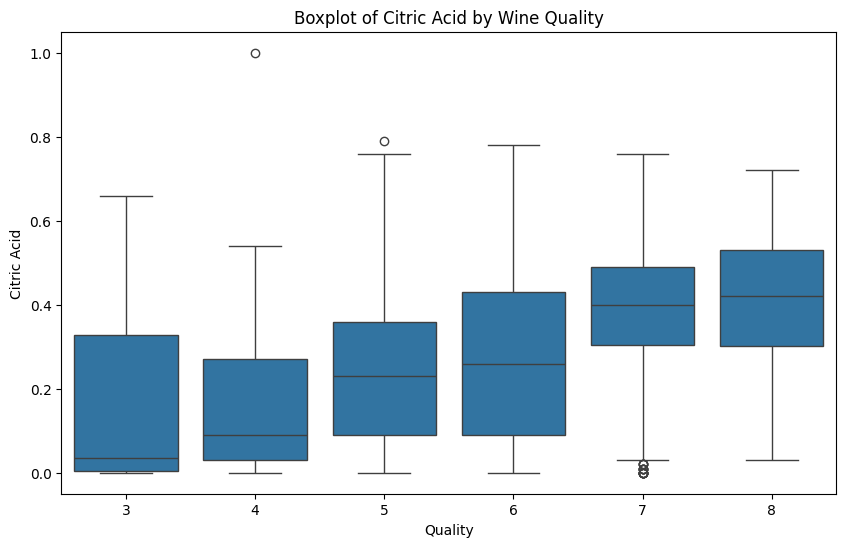

In [20]:
# Boxplot for Citric Acid
plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='citric acid', data=dataset)
plt.title('Boxplot of Citric Acid by Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Citric Acid')
plt.show()

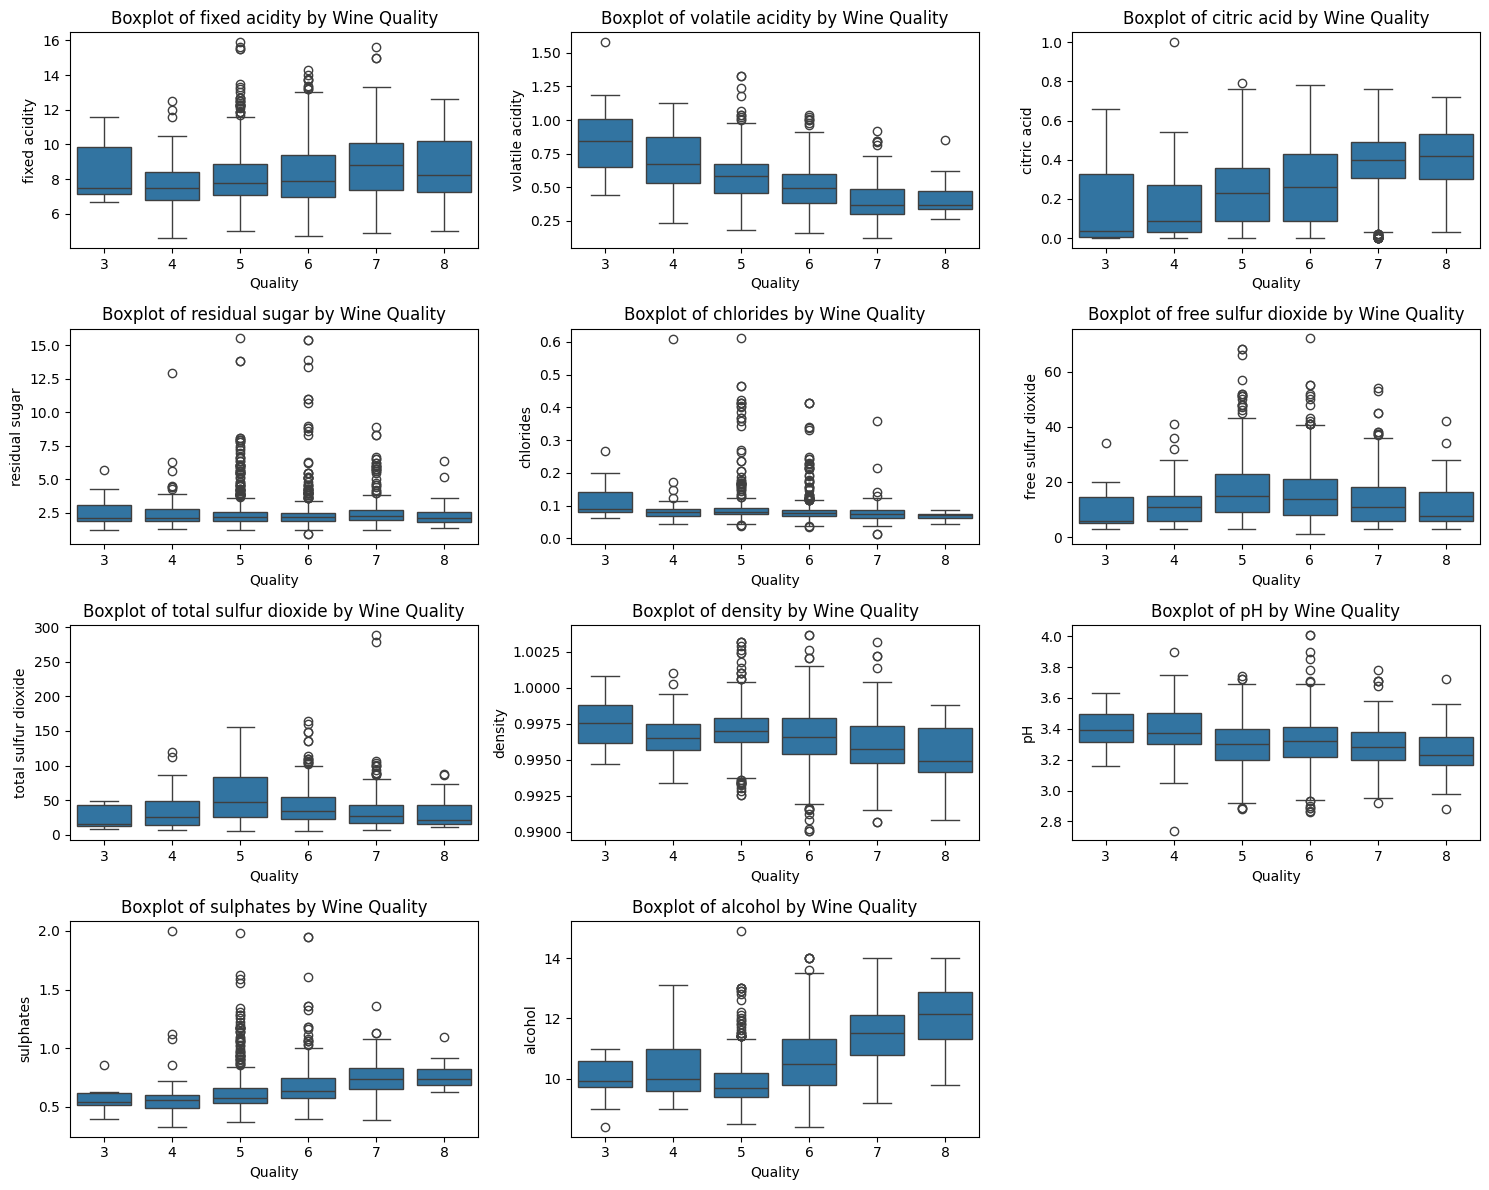

In [21]:
# Boxplots for All Features
plt.figure(figsize=(15, 12))
for i, column in enumerate(dataset.columns[:-1], 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x='quality', y=column, data=dataset)
    plt.title(f'Boxplot of {column} by Wine Quality')
    plt.xlabel('Quality')
    plt.ylabel(column)
plt.tight_layout()
plt.show()

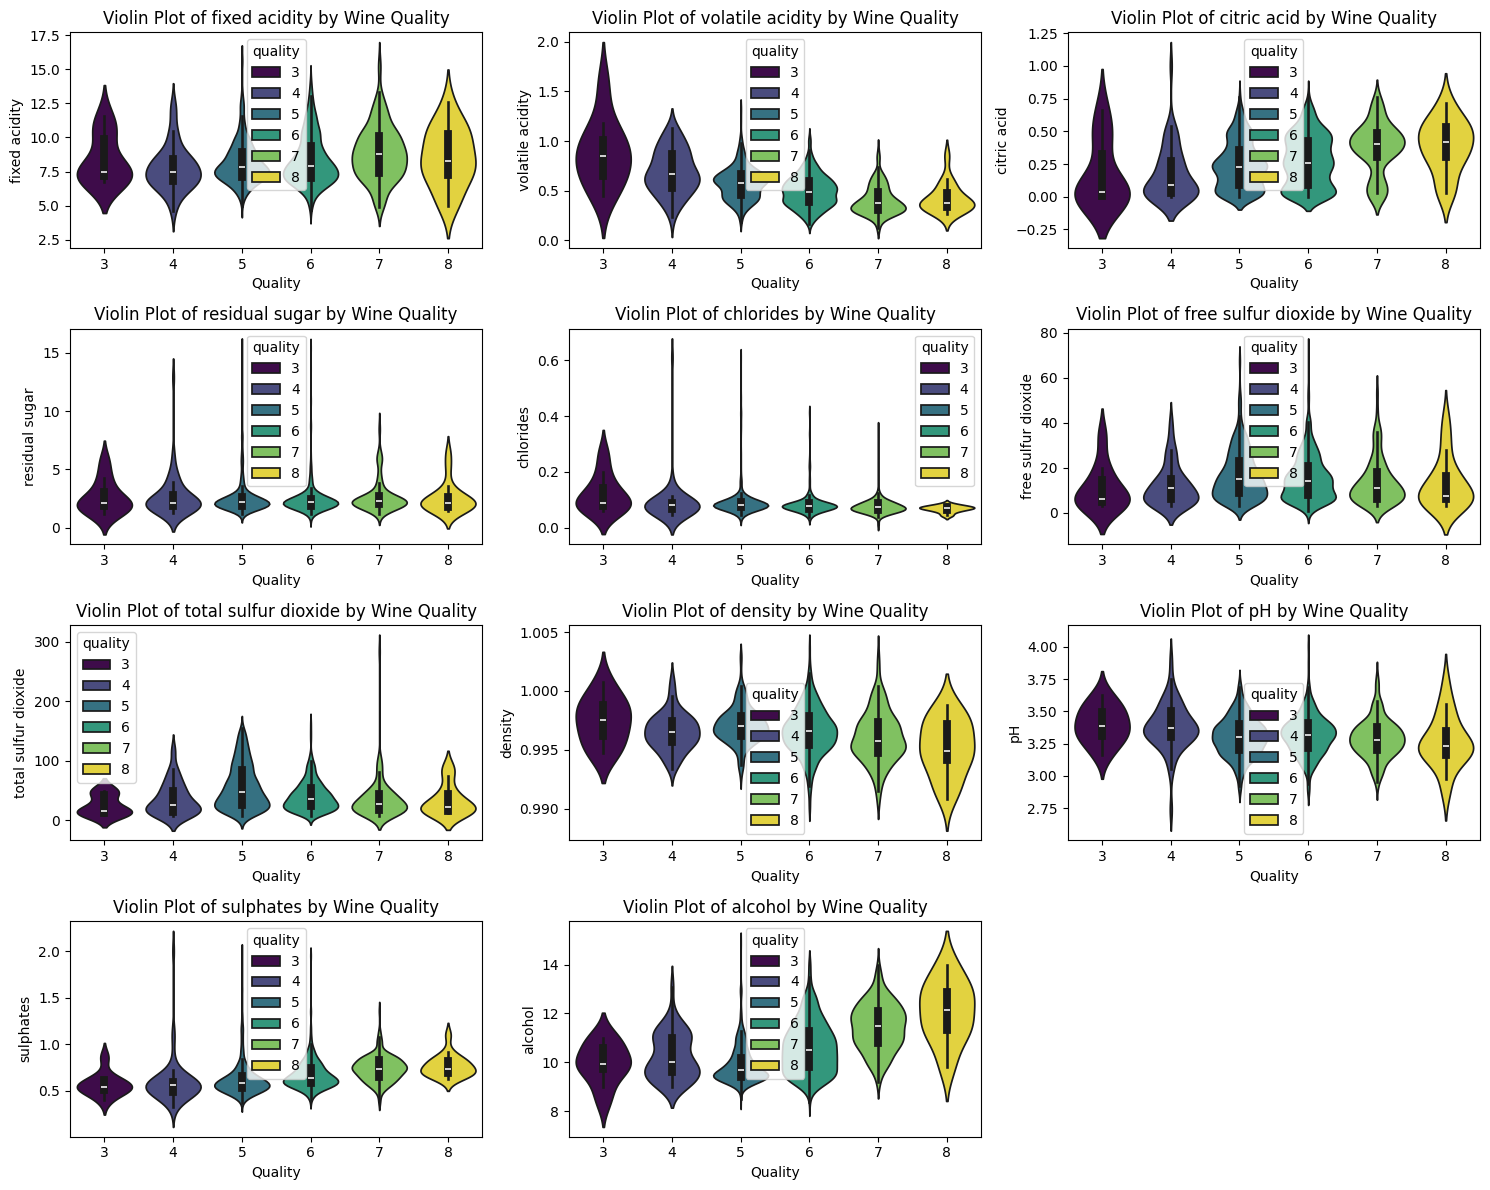

In [24]:
# Plot violin plots for comparison
plt.figure(figsize=(15, 12))
for i, column in enumerate(dataset.columns[:-1], 1):
    plt.subplot(4, 3, i)
    sns.violinplot(x='quality', y=column, data=dataset, hue='quality', palette='viridis')
    plt.title(f'Violin Plot of {column} by Wine Quality')
    plt.xlabel('Quality')
    plt.ylabel(column)
plt.tight_layout()
plt.show()

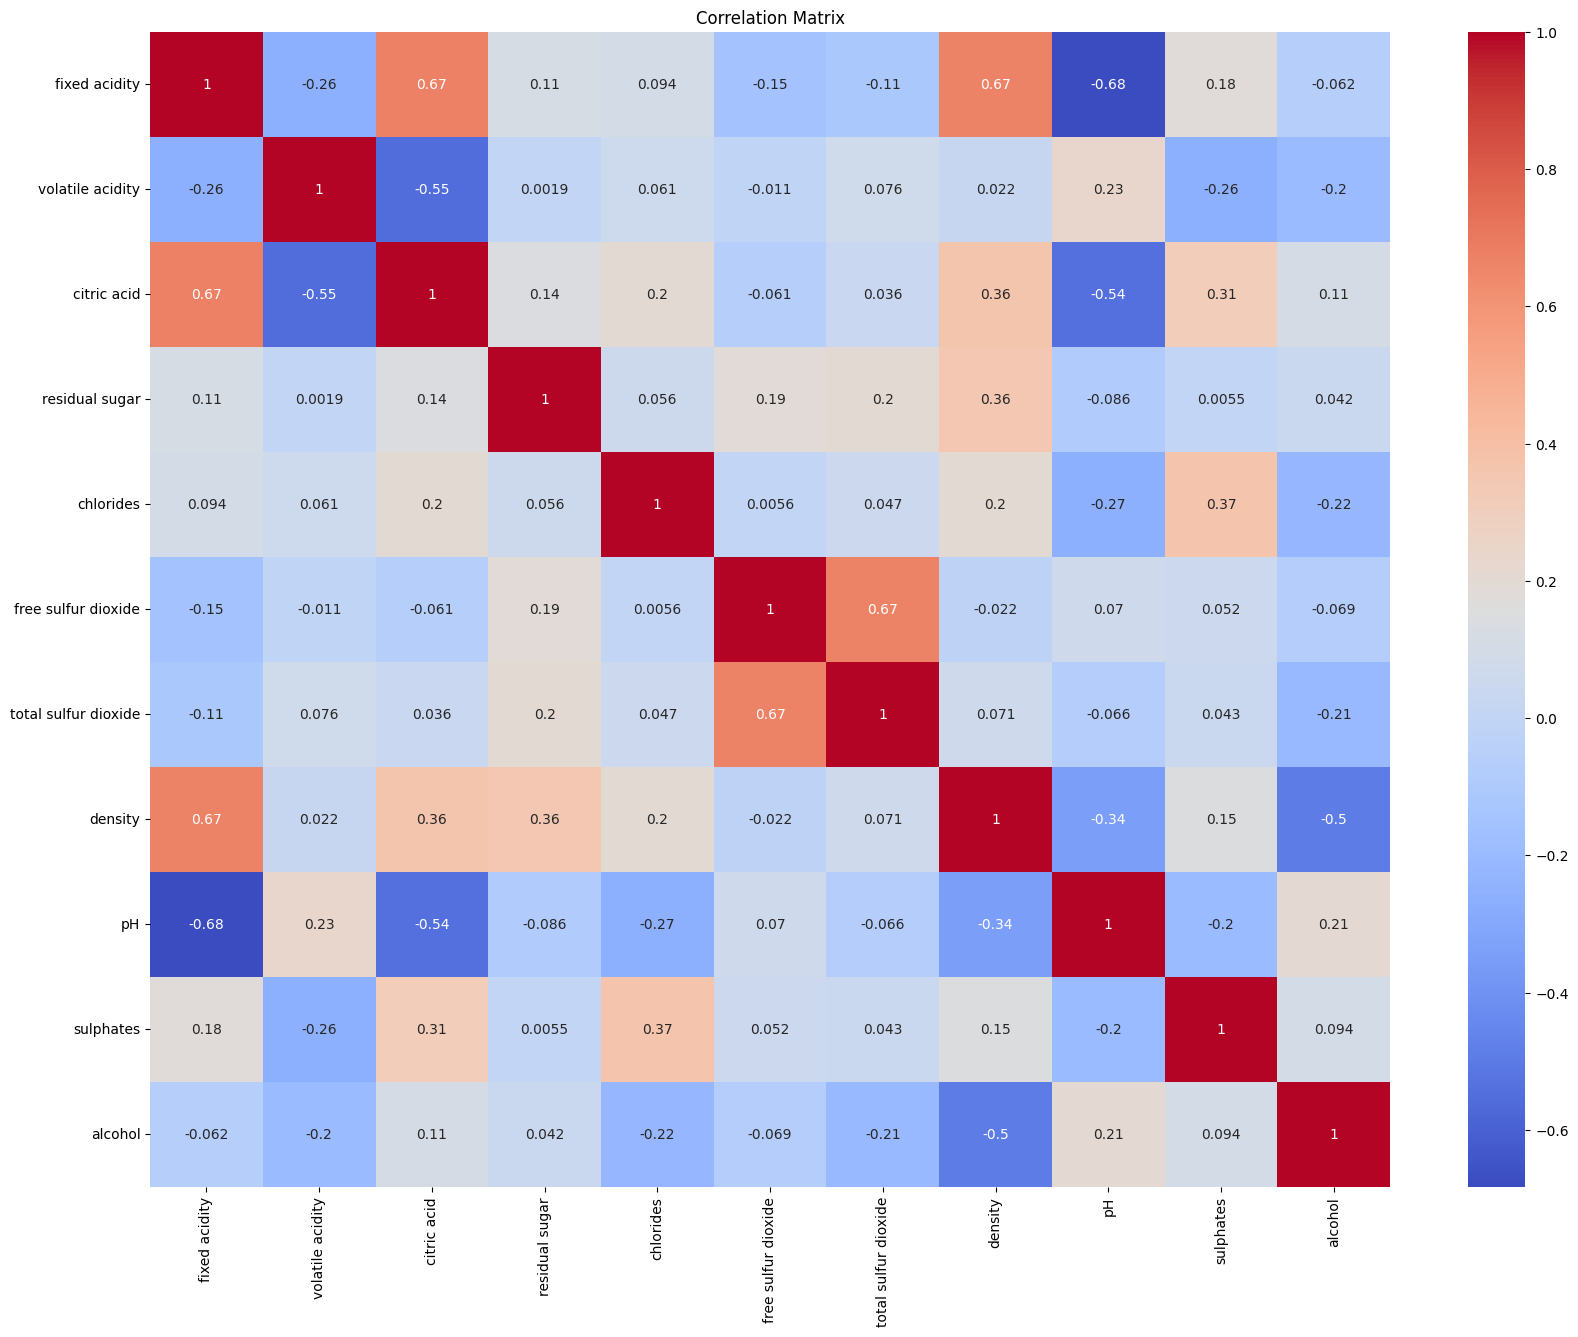

In [25]:
# Compute the correlation matrix
corr_matrix = dataset.drop('quality', axis=1).corr()

# Plot the heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [42]:
# Import packages for Linear Regression Analysis
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics


In [43]:
# Configure the data to train/test
X = dataset.drop('quality', axis=1)
y = dataset['quality']

In [44]:
# Normalize our data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [45]:
# Train-Test data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [46]:
# Train the model with out dataset
# First, create in instance of LinearRegression()
lm = LinearRegression()

In [47]:
# Train/fit lm on the data
lm.fit(X_train, y_train)

LinearRegression()

In [48]:
# Take a look at the coefficients and intercept of the model
print("Coefficents:")
print(lm.coef_)
print("Intercept:")
print(lm.intercept_)

Coefficents:
[ 4.18350337e-02 -1.10065492e+00 -3.15219799e-01  1.31101506e-02
 -1.51864901e+00  7.94043988e-04 -2.69156631e-03 -9.62355220e+00
 -4.22741491e-01  8.67638095e-01  3.05776825e-01]
Intercept:
13.42423807157103


In [49]:
# Now that the model if fit, we will predict our test data
predictions = lm.predict(X_test)

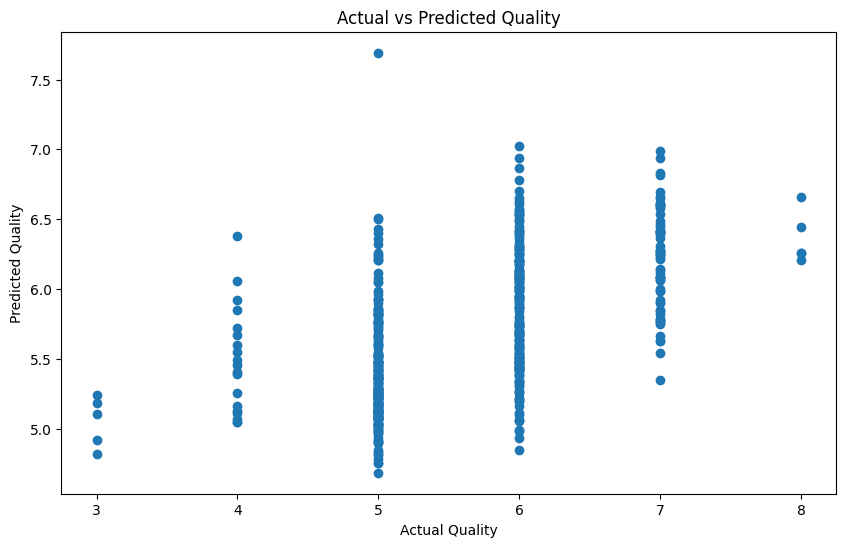

In [51]:
# Create a scatterplot to compare the real test data vs the predict data
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions)
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title('Actual vs Predicted Quality')
plt.show()

In [52]:
coef_df = pd.DataFrame(lm.coef_, X.columns, columns=["Quality"])
coef_df

Quality
fixed acidity         0.041835
volatile acidity     -1.100655
citric acid          -0.315220
residual sugar        0.013110
chlorides            -1.518649
free sulfur dioxide   0.000794
total sulfur dioxide -0.002692
density              -9.623552
pH                   -0.422741
sulphates             0.867638
alcohol               0.305777

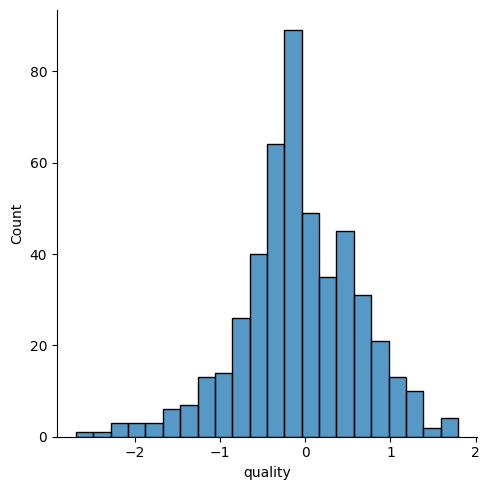

In [53]:
sns.displot((y_test - predictions))

In [54]:
# Look at the Mean Absolute Error
metrics.mean_absolute_error(y_test, predictions)

0.5330378570424543

In [55]:
# Look at the Mean Squared Error
metrics.mean_squared_error(y_test, predictions)

0.4908886154893234

In [57]:
# Look at the Mean Squared Error
np.sqrt(metrics.mean_squared_error(y_test, predictions))

0.700634437841392

In [59]:
r2 = metrics.r2_score(y_test, predictions)
print(f'R² Score: {r2}')

R² Score: 0.3036354976804003
